<a href="https://colab.research.google.com/github/CheayeonLee/ESAA_OB/blob/main/2%EC%A3%BC%EC%B0%A8%EA%B3%BC%EC%A0%9C(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CH4. 모델 훈련

## 4.1 선형 회귀

모델을 훈련시킨다는 것
- 모델이 훈련 세트에 가장 잘 맞도록 모델 파라미터를 설정하는 것

모델이 훈련 데이터에 얼마나 잘 들어맞는지 측정해야 함
- 선형 회귀 모델의 RMSE를 최소화시키는 벡터를 찾아야 함
(RMSE보다 MSE를 최소화하는 것이 같은 겨로가를 내면서 더 간단)

### 4.1.1 정규방정식

정규방정식
- 비용 함수를 최소화하는 벡터값을 찾기 위한 해석적인 방법. 즉 바로 결과를 얻을 수 있는 수학 공식
- seta = (XT*X)-1*XT*y

In [1]:
# 공식을 테스트하기 위해 선형처럼 보이는 데이터 생성
import numpy as np

X = 2 * np.random.rand(100,1)
y = 4 + 3 * X + np.random.randn(100,1)

In [2]:
# seta 계산
# inv()함수를 이용해 역행렬 계산
# dot()메서드를 사용해 행렬 곱셈
X_b = np.c_[np.ones((100,1)),X] # 모든 샘플에 x0 = 1을 추가합니다.
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

# y = 4 + 3x1 + 가우시안_잡음
theta_best

array([[4.2211473 ],
       [2.68669662]])

seta0 = 4, seta1 = 3을 기대했으나 잡음 때문에 원래 함수의 파라미터를 정확하게 재현하진 못함

In [3]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)), X_new] # 모든 샘플에 x0 = 1을 추가합니다.
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.2211473 ],
       [9.59454054]])

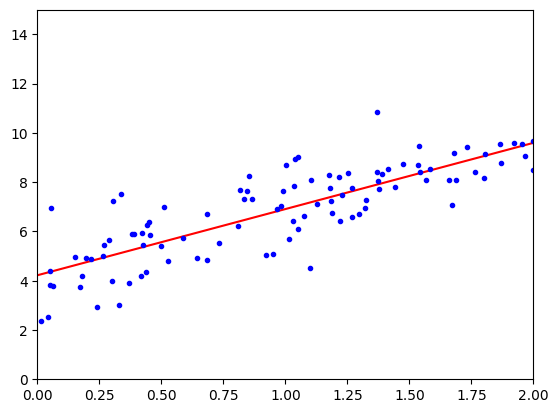

In [4]:
import matplotlib.pyplot as plt
plt.plot(X_new, y_predict, 'r-')
plt.plot(X, y, 'b.')
plt.axis([0,2,0,15])
plt.show()

In [5]:
# 사이킷런에서 선형 회귀 수행
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_, lin_reg.coef_

(array([4.2211473]), array([[2.68669662]]))

In [6]:
lin_reg.predict(X_new)

array([[4.2211473 ],
       [9.59454054]])

In [7]:
# scipy.linalg.lstsq() 함수('최소 제곱'에서 이름을 따옴)를 직접 호출
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond = 1e-6)
theta_best_svd

array([[4.2211473 ],
       [2.68669662]])

유사 역행렬
- 자체는 특잇값 분해(SVD)라 부르는 표준 행렬 분해 기법을 사용해 계산
- 정규방정식을 계산하는 것보다 효율적이고 극단적인 경우도 처리할 수 있음
- 정규방정식과 달리 XtX의 역행렬이 없어도 작동하여 구할 수 있음

In [8]:
# 유사 역행렬
np.linalg.pinv(X_b).dot(y)

array([[4.2211473 ],
       [2.68669662]])

### 4.1.2 계산 복잡도

계산 복잡도: 역행렬을 계산(O(n^2.4)에서 O(n^3))사이
- 샘플 수와 특성 수는 선형적: 샘플이 2배로 늘어나면 걸리는 시간도 거의 2배 증가

## 4.2 경사 하강법

- 특성이 매우 많고 훈련 샘플이 너무 많아 메모리에 모두 담을 수 없을 때 적합
- 최적화 알고리즘
- 비용 함수를 최소화하기 위해 반복해서 파라미터를 조정해가는 것
- 그레디언트(기울기)가 감소하는 방향으로 진행(0이 최솟값)
- 학습률(learning rate): 너무 작으면 알고리즘이 수렴하기 위해 반복을 많이 진행해야 하므로 시간이 오래 걸림

선형 회귀를 위한 MSE 비용 함수
- 볼록 함수(convex function): 하나의 전역 최솟값만 존재

파라미터 공간
- 모델이 가진 파라미터가 많을수록 이 공간의 차원은 커지고 검색도 어려워짐

### 4.2.1 배치 경사 하강법

- 편도함수: seta가 조금 변경될 때 비용 함수가 얼마나 바뀌는지를 계산
- 단점: 매 스텝에서 전체 훈련 세트를 사용해 그레이디언트를 계산하므로 훈련 세트가 커지면 매우 느려짐

In [9]:
eta = 0.1 # 학습률
n_iterations = 100
m = 100

theta = np.random.randn(2,1) # 무작위 초기화

for iteration in range(n_iterations):
  gradients = 2/m * X_b.T.dot(X_b.dot(theta)-y)
  theta = theta - eta * gradients

In [10]:
theta

array([[4.17265436],
       [2.72935985]])

### 4.2.2 확률적 경사 하강법

- 매 스텝에서 한 개의 샘플을 무작위로 선택하고 그 하나의 샘플에 대한 그레이디언트를 계산(훨씬 빠름)
-단점: 확률적(무작위)이므로 배치경사보다 불안정 / 전역 최솟값에 다다르지 못하게 함
- 해결: 학습률을 점진적으로 감소시켜야 함(시작은 크게, 점차 줄이는 것)

In [11]:
# 확률적 경사 하강법 구현
n_epochs = 50 # 각 반복
t0, t1 = 5, 50 # 학습 스케줄 하이퍼파라미터

def learning_schedule(t):
  return t0 / (t + t1)

theta = np.random.randn(2,1) # 무작위 초기화

for epoch in range(n_epochs):
  for i in range(m): # 한 반복에서 m번 되풀이
    random_index = np.random.randint(m)
    xi = X_b[random_index:random_index+1]
    yi = y[random_index:random_index+1]
    gradients = 2 * xi.T.dot(xi.dot(theta)-yi)
    eta = learning_schedule(epoch * m + i)
    theta = theta - eta * gradients

In [12]:
theta

array([[4.20781096],
       [2.72632595]])

In [13]:
from sklearn.linear_model import SGDRegressor
# 최대 1000번 에포크 동안 실행 / tol이 0.001은 이보다 적게 손실이 줄어들 때까지 실행
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [14]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.19108265]), array([2.66428862]))

### 4.2.3 미니배치 경사 하강법

- 하나의 샘플 기반이 아니라 미니배치라 부르는 임의의 작은 샘플 세트에 대해 그레이디언트를 계산
- 확률적 경사 하강법에 비해 미니배치는 행렬 연산에 최적화된 하드웨어, GPU를 사용해서 얻는 성능 향상
- 미니배치 경사 하강법이 SGD보다 최솟값에 더 가까이 도달하게 될 것

## 4.3 다항 회귀

- 데이터가 단순한 직선보다 복잡한 형태인 경우: 각 특성의 거듭제곱을 새로운 특성으로 추가하고, 이 확장된 특성을 포함한 데이터셋에 선형 모델을 훈련시킴

In [15]:
m = 100
X = 6 * np.random.rand(m, 1) -3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

In [16]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias = False) # 2차 다항
X_poly = poly_features.fit_transform(X)
print(X[0])
print(X_poly[0]) # 원래 특성 X와 특성의 제곱을 포함

[-2.6803424]
[-2.6803424   7.18423539]


In [17]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([2.3096773]), array([[0.92841546, 0.38240673]]))

## 4.4 학습 곡선

- 훈련 세트와 검증 세트의 모델 성능을 훈련 세트 크기의 함수로 나타냄

In [18]:
# 주어진 훈련 데이터에서 모델의 학습 곡선을 그리는 함수를 정의
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
  X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
  train_errors, val_errors = [], []
  for m in range(1, len(X_train)):
    model.fit(X_train[:m], y_train[:m])
    y_train_predict = model.predict(X_train[:m])
    y_val_predict = model.predict(X_val)
    train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))
  plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label='훈련 세트')
  plt.plot(np.sqrt(val_errors),'b-', linewidth=3, label='검증 세트')

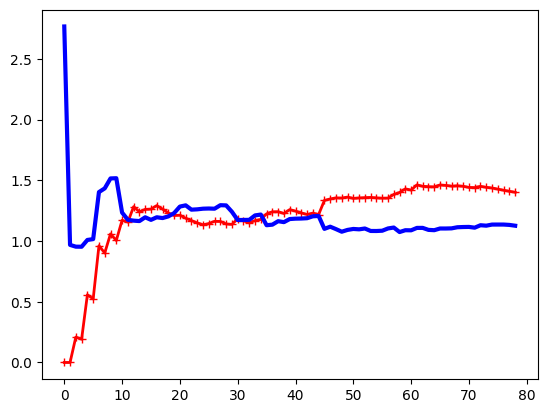

In [19]:
# 과소적합
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

훈련 데이터
- 훈련 세트에 샘플이 추가됨에 따라 잡음도 있고 비선형이기 때문에 모델이 훈련 데이터를 완벽히 학습하는 것이 불가능
- 곡선이 어느 정도 평편해질 때까지 오차가 계속 상승(이후로는 괜찮음)


검증 데이터
- 적은 수의 훈련 샘플일 때는 제대로 일반화할 수 없어 검증 오차가 초기에 매우 큼
- 추가됨에 따라 학습이 되고 검증 오차가 천천히 감소

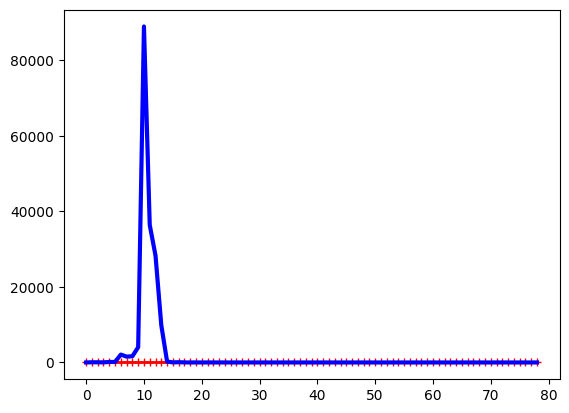

In [20]:
# 과대적합모델
# 같은 데이터에서 10차 다항 회귀 모델의 학습 곡선
from sklearn.pipeline import Pipeline # 단계별로 동시 수행

polynomial_regression = Pipeline([
    ('poly_features', PolynomialFeatures(degree=10, include_bias=False)),
    ('lin_reg', LinearRegression()),
])

plot_learning_curves(polynomial_regression, X, y)

- 훈련 데이터의 오차가 선형 회귀 모델보다 훨씬 낮음
- 두 곡선 사이에 있음
- 더 큰 훈련 세트를 사용하면 점점 가까워질 거라는 것

## 4.5 규제가 있는 선형 모델
- 과대적합을 감소시키는 좋은 방법은 모델을 규제하는 것

### 4.5.1 릿지 회귀

In [21]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver='cholesky')
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])

array([[4.5203401]])

In [22]:
sgd_reg = SGDRegressor(penalty='l2') # penalty는 매개변수를 사용할 규제를 지정 penalty='l2'가 릿지회귀와 같음
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([4.48776048])

### 4.5.2 라쏘 회귀

- 선형 회귀의 또 다른 규제되 버전
- 덜 중요한 특성의 가중치를 제거(자동으로 특성을 선택하고 희소 모델을 만듦)

In [23]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
# Lasso 대신 SGDRegressor(penalty='l1')도 가능
lasso_reg.fit(X,y)
lasso_reg.predict([[1.5]])

array([4.4596014])

### 4.5.3 엘라스틱넷

- 릿지 회귀와 라쏘 회귀를 절충한 모델
- 혼합 정도는 혼합 비율 r을 사용해 조절
- r=0: 릿지, r=1: 라쏘

In [24]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio = 0.5)
elastic_net.fit(X,y)
elastic_net.predict([[1.5]])

array([4.46679207])

3가지의 차이
- 기본: '릿지'
- 쓰이는 특성이 몇 개 뿐: '라쏘'/'엘라스틱넷'
- 특성 수가 훈련 샘플 수보다 많거나 특성 몇 개가 강하게 연관: '엘라스틱넷'

### 4.5.4 조기 종료

In [36]:
from sklearn.base import clone
from sklearn.preprocessing import StandardScaler
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
# 데이터 준비
poly_scaler = Pipeline([
    ('poly_features', PolynomialFeatures(degree=90, include_bias=False)),
    ('std_scaler', StandardScaler())
])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1, tol=None, warm_start=True,
                       penalty=None, learning_rate='constant', eta0=0.0005)

minimun_val_error = float('inf') # 무한대 상수
best_epoch = None
best_model = None
for epoch in range(1000):
  sgd_reg.fit(X_train_poly_scaled, y_train) # 훈련을 이어서 진행합니다.
  y_val_predict = sgd_reg.predict(X_val_poly_scaled)
  val_error = mean_squared_error(y_val, y_val_predict)
  if val_error < minimun_val_error:
    minimum_val_error = val_error
    best_epoch = epoch
    best_model = clone(sgd_reg)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

## 4.6 로지스틱 회귀

- 분류에서도 사용할 수 있는 회귀 알고리즘
- 이진 분류기

### 4.6.1 확률 추정

- 선형 회귀 모델처럼 입력 특성의 가중치의 합 계산
- 선형 회귀 모델과 달리 결과를 출력하지 않고 결괏값의 로지스틱을 출력
- 시그모이드함수(0,1) s자 모양

### 4.6.2 훈련과 비용 함수
- 목적: 양성샘플은 높은 확률 추정 음성샘플은 낮은 확률을 추정하는 theta 찾는 것
- 각 샘플에 대해 예측 오차를 계산하고 j번째 특성값을 곱해서 모든 훈련 샘플에 대해 평균을 냄

### 4.6.3 결정 경계

In [37]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [38]:
X = iris['data'][:,3:] # 꽃잎의 너비
y = (iris['target']==2).astype(np.int) # 1Iris-Virginica면 1, 그렇지 않으면 0

<ipython-input-38-ce6546e404a0>:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = (iris['target']==2).astype(np.int) # 1Iris-Virginica면 1, 그렇지 않으면 0


In [39]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X,y)

LogisticRegression()

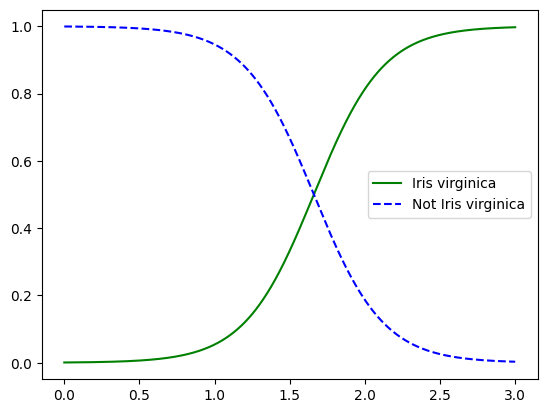

In [42]:
# 꽃잎의 너비가 0~3cm인 꽃에 대해 모델의 추정 확률을 계산
X_new = np.linspace(0,3,1000).reshape(-1,1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:,1], 'g-', label='Iris virginica')
plt.plot(X_new, y_proba[:,0], 'b--', label='Not Iris virginica')
plt.legend()
# 다음은 이미지를 미려하게 출력하기 위한 맷플롯립 코드가 이어집니다.

- 꽃잎 너비가 2cm 이상인 꽃은 분류기가 Iris-Verginica라고 강하게 확신
- 1cm 아래면 아니라고 확신

In [46]:
# 양쪽 확률이 똑같이 50%가 되는 1.6cm 근방에서 결정 경계가 만들어짐
log_reg.predict([[1.7],[1.5]])

array([1, 0])

### 4.6.4 소프트맥스 회귀(다항 로지스틱 회귀)

- 여러 개의 이진 분류기를 훈련시켜 연결하지 않고 직접 다중 클래스를 지원하도록 일반화
- cross entropy: 추정된 클래스의 확률이 타깃 클래스에 얼마나 잘 맞는지 측정하는 용도로 종종 사용

In [47]:
X = iris['data'][:,(2,3)] # 꽃잎 길이, 꽃잎 너비
y = iris['target']

# solver='lbfgs': 소프트맥스 회귀를 지원하는 알고리즘
softmax_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', C=10)
softmax_reg.fit(X,y)

LogisticRegression(C=10, multi_class='multinomial')

In [50]:
# 꽃잎의 길이: 5cm, 너비: 2cm
# Iris-Virginica(클래스2)라고 출력
softmax_reg.predict([[5,2]])

array([2])

In [51]:
# 5.8% 확률로 Iris-Versicolor라고 출력
softmax_reg.predict_proba([[5,2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])